In [ ]:
from google.colab import files
uploaded =files.upload()


Saving Mall_Customers.csv to Mall_Customers (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


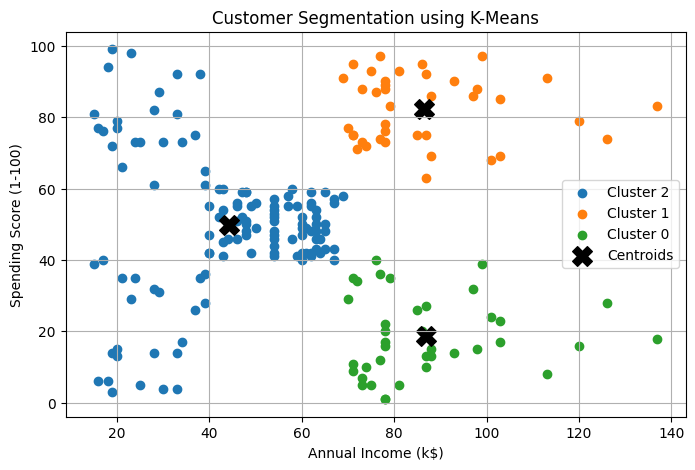

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Optional: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 5))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

# Plot centroids (in original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=200, c='black', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.grid(True)
plt.show()





